In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mt
from sklearn.externals import joblib
import tensorflow as tf

In [4]:
RawTitanic = pd.read_csv("data_titanic_proyecto.csv")
RawTitanic.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y


In [5]:
RawTitanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
RawTitanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
RawTitanic["passenger_class"].value_counts()

Lower     491
Upper     216
Middle    184
Name: passenger_class, dtype: int64

In [8]:
# Completar los valores faltantes de Age con la mediana de los datos disponibles
RawTitanic["Age"] = RawTitanic["Age"].fillna(RawTitanic["Age"].median());
RawTitanic["Age"].isnull().sum()

# Convertimos Sex a variable dicótoma, Sex = 1 si es mujer
RawTitanic["Female"] = (RawTitanic["passenger_sex"] == 'F').astype(np.float)

# Limpiar el embarcamiento
RawTitanic["Embarked"] = RawTitanic["Embarked"].fillna('X')
RawTitanic["Embarked_S"] = (RawTitanic["Embarked"] == 'S').astype(np.float32)
RawTitanic["Embarked_C"] = (RawTitanic["Embarked"] == 'C').astype(np.float32)
RawTitanic["Embarked_Q"] = (RawTitanic["Embarked"] == 'Q').astype(np.float32)
#RawTitanic["Embarked_cleaned"] = np.where(RawTitanic["Embarked"]=="S", 1, 
#    np.where(RawTitanic["Embarked"]=="C", 2, np.where(RawTitanic["Embarked"]=="Q", 3, 0)))

# Asignar la clase de pasajero
RawTitanic["Class_Lower"] = (RawTitanic["passenger_class"] == 'Lower').astype(np.float32)
RawTitanic["Class_Middle"] = (RawTitanic["passenger_class"] == 'Middle').astype(np.float32)
RawTitanic["Class_Upper"] = (RawTitanic["passenger_class"] == 'Upper').astype(np.float32)
#RawTitanic["Pclass_cleaned"] = np.where(RawTitanic["passenger_class"]=="Lower", 1, 
#    np.where(RawTitanic["passenger_class"]=="Middle", 2, np.where(RawTitanic["passenger_class"]=="Upper", 3, 0)))

RawTitanic["Survived"] = (RawTitanic["passenger_survived"].values == 'Y').astype(np.float32)
RawTitanic.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper,Survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
# Obtener las variables para los modelos
NumFields = ["Age", "SibSp", "Parch", "Fare", "Female", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]
#numeric_fields = ["Age", "Fare", "Sex", "Embarked_cleaned", "Pclass_cleaned"]
y = RawTitanic["Survived"].values
X = RawTitanic[NumFields].values

X.shape, y.shape

((891, 11), (891,))

In [11]:

RawTitanic[NumFields].head(20)

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,35.0,1,0,53.1000,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,28.0,0,0,8.4583,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,27.0,0,2,11.1333,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
DataFields = ["Age", "SibSp", "Parch", "Fare", "Female", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

RawTitanic[DataFields].to_csv('TitanicProcessed.csv')

In [13]:
# Librería con la función para separar los datos
from sklearn.model_selection import train_test_split

In [16]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, 
                                                          test_size = 0.2, 
                                                          shuffle = True,
                                                          random_state = 314)

# Separación de los datos de entrenamiento y de validación
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, 
                                                  test_size = 0.2, 
                                                  random_state = 42)

X_train.shape, X_val.shape, X_test.shape

((569, 11), (143, 11), (179, 11))

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
X_train.shape

(569, 11)

In [20]:
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = 10., kernel='rbf', gamma = 0.01, tol = 0.001, max_iter = 5000))
])

# Se ajusta el model y se evalúa su accuracy en los datos de 
# entrenamiento y validación
svm_model.fit(X_train, y_train.reshape(len(y_train), ));
svm_model.score(X_train, y_train), svm_model.score(X_val, y_val)

(0.8137082601054482, 0.8251748251748252)

In [21]:

# Computar las diferentes métricas sobre el conjunto de validación
y_pred = svm_model.predict(X_val)
(mt.accuracy_score(y_val, y_pred, normalize=True), 
    mt.f1_score(y_val, y_pred), 
    mt.precision_score(y_val, y_pred), 
    mt.recall_score(y_val, y_pred, average='weighted'))

(0.8251748251748252, 0.761904761904762, 0.851063829787234, 0.8251748251748252)

In [22]:
# Función para entrenar la SVM con hiperparámetro C
def entrenar_svm(X, y, C_param): 
    # Se define una SVM con kernel gaussiano y escalamiento de features
    svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = C_param, kernel='rbf', tol = 0.001, max_iter = 5000))])
    
    # Entrenar el modelo
    svm_model.fit(X, y.reshape(len(y), ))
    
    # Devolver el objeto del modelo
    return svm_model

# Función para obtener las métricas en conjuntos de entrenamiento y validación
# Métricas devueltas en formato (accuracy, f1_score, precision, recall)
# Función devuelve 2 listas: [Métricas de entrenamiento], [Métricas de validación]
def getMetrics(modelo, X_train, y_train, X_val, y_val):
    # Métricas en datos de entrenamiento
    y_pred = modelo.predict(X_train)
    trainMetrics = [mt.accuracy_score(y_train, y_pred, normalize=True), 
                    mt.f1_score(y_train, y_pred), 
                    mt.precision_score(y_train, y_pred), 
                    mt.recall_score(y_train, y_pred, average='weighted')]
    
    # Métricas en datos de entrenamiento
    y_pred = modelo.predict(X_val)
    validationMetrics = [mt.accuracy_score(y_val, y_pred, normalize=True), 
                    mt.f1_score(y_val, y_pred), 
                    mt.precision_score(y_val, y_pred), 
                    mt.recall_score(y_val, y_pred, average='weighted')]
    
    return trainMetrics, validationMetrics

In [23]:
C_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
#gamma_param_list = [0.1, 0.5, 1., 2., 3., 5., 7.5, 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for c in C_param_list:
    svm = entrenar_svm(X_train, y_train, C_param = c)
    trainMetrics, valMetrics = getMetrics(svm, X_train, y_train, X_val, y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [24]:
svmResults = pd.DataFrame(np.column_stack((C_param_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['C', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
svmResults

,C,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.803163,0.685393,0.917293,0.803163,0.776224,0.659574,0.861111,0.776224
1,0.5,0.826011,0.734584,0.913333,0.826011,0.811189,0.727273,0.878049,0.811189
2,1.0,0.831283,0.743316,0.920530,0.831283,0.818182,0.740000,0.880952,0.818182
3,2.0,0.834798,0.750000,0.921569,0.834798,0.818182,0.740000,0.880952,0.818182
4,3.0,0.838313,0.756614,0.922581,0.838313,0.825175,0.752475,0.883721,0.825175
5,4.0,0.845343,0.772021,0.914110,0.845343,0.825175,0.752475,0.883721,0.825175
6,5.0,0.843585,0.772379,0.898810,0.843585,0.832168,0.769231,0.869565,0.832168
7,6.0,0.848858,0.782828,0.895954,0.848858,0.832168,0.773585,0.854167,0.832168
8,7.0,0.855888,0.795000,0.898305,0.855888,0.839161,0.785047,0.857143,0.839161
9,8.0,0.859402,0.801980,0.895028,0.859402,0.839161,0.785047,0.857143,0.839161


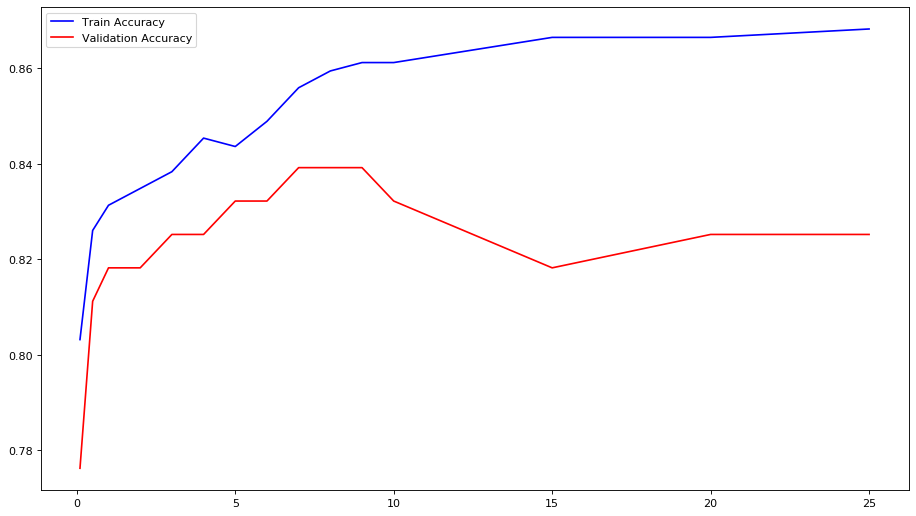

In [25]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svmResults.C, svmResults.AccuracyTrain, 'b-', 
         svmResults.C, svmResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));


In [27]:

# Mejor modelo de SVM
svm_final = entrenar_svm(X_train, y_train, C_param = 9)

# Se guarda el mejor modelo
#joblib.dump(svm_final, "modelos/svm.pkl")

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'svc__C' : [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.], 
              'svc__gamma' : [0.1, 0.5, 1., 2., 3., 5., 7.5, 10., 15., 20., 25.]}

svc = SVC(gamma="scale")
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = 'rbf', tol = 0.001, max_iter = 5000))])

clf = GridSearchCV(svm_model, parameters, cv=5, iid=False, verbose=True, n_jobs=4)
clf.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 165 candidates, totalling 825 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 181 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 825 out of 825 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=5000,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
              

In [29]:
clf.best_params_

{'svc__C': 3.0, 'svc__gamma': 0.1}

In [30]:

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = 3.0, gamma = 0.1, kernel='rbf', tol = 0.001, max_iter = 5000))])

# Entrenar el modelo
svm_model.fit(X_train_cv, y_train_cv.reshape(len(y_train_cv), ))

getMetrics(svm_model, X_train, y_train, X_val, y_val)

([0.8453427065026362,
  0.7720207253886012,
  0.9141104294478528,
  0.8453427065026362],
 [0.8461538461538461,
  0.7884615384615384,
  0.8913043478260869,
  0.8461538461538461])

IndentationError: expected an indented block (<ipython-input-32-d57957660204>, line 14)

In [33]:
def entrenar_reg_logistica(Xtrain, Ytrain, lr, lambda_val, epochs):
    import time
    
    # Obtener features de Xtrain y número de  ejemplos
    m, k = Xtrain.shape
    
    # Crear el grafo
    # -------------------------------------------------------------------------
    tf.reset_default_graph()
    g = tf.Graph()
    # Definimos tensores y operaciones en g
    with g.as_default():
        # Creando los placeholders
        X = tf.placeholder(tf.float32, shape = (None, k), name = "X")
        Ylabels = tf.placeholder(tf.float32, name = "Ylabels")

        # Hiperparámetros del modelo
        lr_param = tf.placeholder(tf.float32, name = "lr")
        lambda_param = tf.placeholder(tf.float32, name = "lambda")

        # Coeficientes de regresión de logits, incluyendo intercepto
        W = tf.Variable(tf.truncated_normal(shape = [k, 1]), name = "W")
        b = tf.Variable(tf.truncated_normal(shape = (1, 1)), name = "b")
        
        # Logits de regresión multiple multiclase y pronóstico de clases
        with tf.name_scope("Logits"):
            Logits = tf.add(tf.matmul(X, W), b, name = "Logits")
            YlabelsHat = tf.nn.sigmoid(Logits)

        # Función de costo
        with tf.name_scope("FuncionCosto"):
            # Término de regularización
            w_norm = tf.divide(tf.multiply(tf.multiply(tf.constant(0.5), lambda_param), 
                                 tf.reduce_sum(tf.square(W))), tf.cast(m, tf.float32), name = "W_norm")
            # Costo por clasificación
            classif_term = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                labels = Ylabels, logits = Logits), name = "CostoClasif") 
            # Costo total
            cost = tf.add(classif_term, w_norm, name="Costo")

        # Gradient Descent Optimizer 
        with tf.name_scope("GradientDes.Optimizer"):
            optimizer = tf.train.GradientDescentOptimizer(lr_param).minimize(cost) 
        
        # Global Variables Initializer 
        init = tf.global_variables_initializer() 
        
    # Entrenamiento del modelo
    # -------------------------------------------------------------------------
    start = time.time()
    with tf.Session(graph = g) as sess: 
        # Inicializar variables
        sess.run(init)
        # Ejecutar batch gradient descent
        for epoch in range(epochs):
            _, c_ = sess.run([optimizer, cost], 
                             feed_dict = {X : Xtrain, Ylabels : Ytrain.reshape((m, 1)), 
                                          lr_param : lr, lambda_param : lambda_val})
            # Status
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t costo = %0.4f" % (epoch+1, c_))
                
        # Obtener los parámetros finales para devolverlos
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    
    # Devolver los parámetros
    return w_, b_

In [34]:

w_, b_ = entrenar_reg_logistica(X_train, y_train, lr = 0.001, epochs = 1000, lambda_val = 8.)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 100, 	 costo = 3.1797
Epoch: 200, 	 costo = 0.9261
Epoch: 300, 	 costo = 0.9196
Epoch: 400, 	 costo = 0.9133
Epoch: 500, 	 costo = 0.9071
Epoch: 600, 	 costo = 0.9011
Epoch: 700, 	 costo = 0.8953
Epoch: 800, 	 costo = 0.8896
Epoch: 900, 	 costo = 0.8840
Epoch: 1000, 	 costo = 0.8786
Tiempo transcurrido: 3.01 segundos


In [35]:
def predecirLogistica(x, weights, b):
    # Función sigmoide
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
     
    # Computar los logits
    l = np.matmul(x, weights) + b
    
    # Predicción binaria
    y_hat = 1.0*(sigmoid(l) > 0.5)
    return y_hat

In [36]:
(mt.accuracy_score(y_train, predecirLogistica(X_train, w_, b_)), 
mt.accuracy_score(y_val, predecirLogistica(X_val, w_, b_)) )

(0.6151142355008787, 0.5944055944055944)

In [37]:
# Función para obtener las métricas en conjuntos de entrenamiento y validación
# Métricas devueltas en formato (accuracy, f1_score, precision, recall)
# Función devuelve 2 listas: [Métricas de entrenamiento], [Métricas de validación]
def getMetricsLog(w, b, X_train, y_train, X_val, y_val):
    # Métricas en datos de entrenamiento
    y_pred = predecirLogistica(X_train, w, b)
    trainMetrics = [mt.accuracy_score(y_train, y_pred, normalize=True), 
                    mt.f1_score(y_train, y_pred), 
                    mt.precision_score(y_train, y_pred), 
                    mt.recall_score(y_train, y_pred, average='weighted')]
    
    # Métricas en datos de entrenamiento
    y_pred = predecirLogistica(X_val, w, b)
    validationMetrics = [mt.accuracy_score(y_val, y_pred, normalize=True), 
                    mt.f1_score(y_val, y_pred), 
                    mt.precision_score(y_val, y_pred), 
                    mt.recall_score(y_val, y_pred, average='weighted')]
    
    return trainMetrics, validationMetrics

In [38]:

RawTitanic[NumFields].head(2)

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [39]:
varFilter = [0,3,4,5,6,7,8,9,10]

lambda_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for lam in lambda_param_list:
    # Entrenar el modelo con parámetro lam
    w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)
    # Obtener las métricas de entrenamiento y validación
    trainMetrics, valMetrics = getMetricsLog(w_, b_, 
                                             X_train[:, varFilter], y_train, 
                                             X_val[:, varFilter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

Epoch: 100, 	 costo = 0.8176
Epoch: 200, 	 costo = 0.7181
Epoch: 300, 	 costo = 0.7159
Epoch: 400, 	 costo = 0.7136
Epoch: 500, 	 costo = 0.7115
Epoch: 600, 	 costo = 0.7093
Epoch: 700, 	 costo = 0.7071
Epoch: 800, 	 costo = 0.7050
Epoch: 900, 	 costo = 0.7029
Epoch: 1000, 	 costo = 0.7008
Tiempo transcurrido: 0.64 segundos
Epoch: 100, 	 costo = 5.3816
Epoch: 200, 	 costo = 1.9177
Epoch: 300, 	 costo = 0.9355
Epoch: 400, 	 costo = 0.9287
Epoch: 500, 	 costo = 0.9220
Epoch: 600, 	 costo = 0.9154
Epoch: 700, 	 costo = 0.9088
Epoch: 800, 	 costo = 0.9023
Epoch: 900, 	 costo = 0.8959
Epoch: 1000, 	 costo = 0.8896
Tiempo transcurrido: 0.70 segundos
Epoch: 100, 	 costo = 4.0505
Epoch: 200, 	 costo = 0.5589
Epoch: 300, 	 costo = 0.5581
Epoch: 400, 	 costo = 0.5573
Epoch: 500, 	 costo = 0.5565
Epoch: 600, 	 costo = 0.5557
Epoch: 700, 	 costo = 0.5549
Epoch: 800, 	 costo = 0.5541
Epoch: 900, 	 costo = 0.5533
Epoch: 1000, 	 costo = 0.5525
Tiempo transcurrido: 0.74 segundos
Epoch: 100, 	 costo = 

In [40]:
regLogResults = pd.DataFrame(np.column_stack((lambda_param_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
regLogResults

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.632689,0.376119,0.562500,0.632689,0.608392,0.300000,0.545455,0.608392
1,0.5,0.509666,0.447525,0.400709,0.509666,0.503497,0.432000,0.402985,0.503497
2,1.0,0.741652,0.662069,0.679245,0.741652,0.720280,0.642857,0.666667,0.720280
3,2.0,0.732865,0.616162,0.705202,0.732865,0.797203,0.718447,0.822222,0.797203
4,3.0,0.463972,0.338395,0.327731,0.463972,0.475524,0.347826,0.350877,0.475524
5,4.0,0.518453,0.431535,0.401544,0.518453,0.517483,0.410256,0.406780,0.517483
6,5.0,0.456942,0.352201,0.330709,0.456942,0.475524,0.358974,0.355932,0.475524
7,6.0,0.539543,0.324742,0.381818,0.539543,0.517483,0.258065,0.342857,0.517483
8,7.0,0.604569,0.369748,0.492537,0.604569,0.559441,0.307692,0.424242,0.559441
9,8.0,0.623902,0.552301,0.517647,0.623902,0.657343,0.573913,0.578947,0.657343


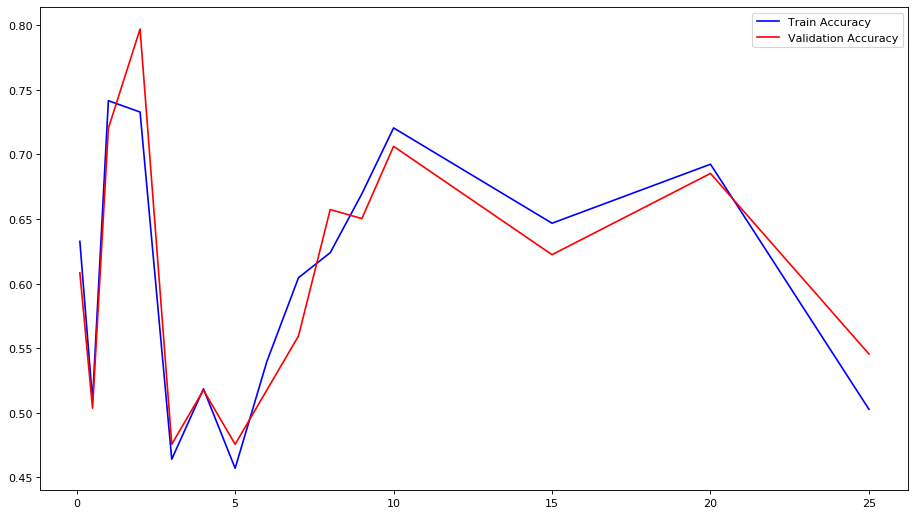

In [41]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(regLogResults.Lambda, regLogResults.AccuracyTrain, 'b-', 
         regLogResults.Lambda, regLogResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [42]:
varFilter = [0,3,4,8,9,10]

lambda_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for lam in lambda_param_list:
    # Entrenar el modelo con parámetro lam
    w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)
    # Obtener las métricas de entrenamiento y validación
    trainMetrics, valMetrics = getMetricsLog(w_, b_, 
                                             X_train[:, varFilter], y_train, 
                                             X_val[:, varFilter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

Epoch: 100, 	 costo = 0.6339
Epoch: 200, 	 costo = 0.6326
Epoch: 300, 	 costo = 0.6313
Epoch: 400, 	 costo = 0.6300
Epoch: 500, 	 costo = 0.6288
Epoch: 600, 	 costo = 0.6275
Epoch: 700, 	 costo = 0.6263
Epoch: 800, 	 costo = 0.6251
Epoch: 900, 	 costo = 0.6239
Epoch: 1000, 	 costo = 0.6227
Tiempo transcurrido: 0.67 segundos
Epoch: 100, 	 costo = 0.8857
Epoch: 200, 	 costo = 0.8814
Epoch: 300, 	 costo = 0.8772
Epoch: 400, 	 costo = 0.8730
Epoch: 500, 	 costo = 0.8689
Epoch: 600, 	 costo = 0.8648
Epoch: 700, 	 costo = 0.8607
Epoch: 800, 	 costo = 0.8567
Epoch: 900, 	 costo = 0.8527
Epoch: 1000, 	 costo = 0.8487
Tiempo transcurrido: 0.68 segundos
Epoch: 100, 	 costo = 1.5627
Epoch: 200, 	 costo = 0.5915
Epoch: 300, 	 costo = 0.5903
Epoch: 400, 	 costo = 0.5892
Epoch: 500, 	 costo = 0.5880
Epoch: 600, 	 costo = 0.5869
Epoch: 700, 	 costo = 0.5858
Epoch: 800, 	 costo = 0.5846
Epoch: 900, 	 costo = 0.5835
Epoch: 1000, 	 costo = 0.5825
Tiempo transcurrido: 0.70 segundos
Epoch: 100, 	 costo = 

In [43]:
# Se compilan los resultados en un dataframe de Pandas
regLogResults = pd.DataFrame(np.column_stack((lambda_param_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
regLogResults

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.699473,0.534060,0.680556,0.699473,0.720280,0.583333,0.736842,0.720280
1,0.5,0.490334,0.296117,0.322751,0.490334,0.503497,0.252632,0.324324,0.503497
2,1.0,0.706503,0.626398,0.625000,0.706503,0.643357,0.571429,0.557377,0.643357
3,2.0,0.653779,0.496164,0.577381,0.653779,0.629371,0.417582,0.575758,0.629371
4,3.0,0.441125,0.358871,0.326007,0.441125,0.440559,0.333333,0.322581,0.440559
5,4.0,0.632689,0.310231,0.587500,0.632689,0.559441,0.112676,0.307692,0.559441
6,5.0,0.694200,0.521978,0.673759,0.694200,0.678322,0.530612,0.650000,0.678322
7,6.0,0.586995,0.281346,0.442308,0.586995,0.559441,0.181818,0.368421,0.559441
8,7.0,0.611599,0.443325,0.505747,0.611599,0.601399,0.359551,0.516129,0.601399
9,8.0,0.634446,0.466667,0.544910,0.634446,0.601399,0.359551,0.516129,0.601399


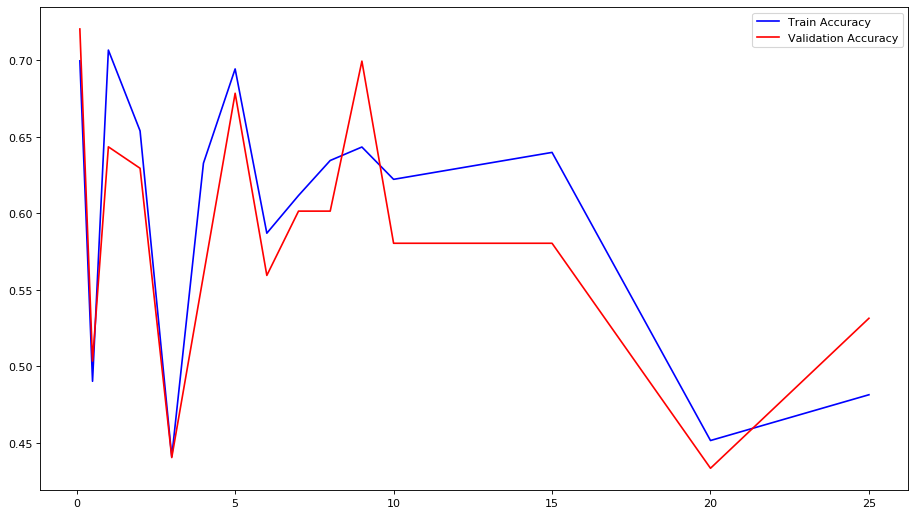

In [44]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(regLogResults.Lambda, regLogResults.AccuracyTrain, 'b-', 
         regLogResults.Lambda, regLogResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [46]:
# Procedemos a guardar los parámetros del modelo y las variables a utilizar
varFilter = [0,3,4,8,9,10]

w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                lr = 0.001, epochs = 3000, lambda_val = 6)

# Guardamos los parámetros entrenados y el filtro de las variables 
#np.savez(file = "modelos/regLogisticaParams.npz", w = w_, b = b_, varFilter = varFilter)

# Accuracy del modelo
(mt.accuracy_score(y_train, predecirLogistica(X_train[:, varFilter], w_, b_)), 
mt.accuracy_score(y_val, predecirLogistica(X_val[:, varFilter], w_, b_)) )

Epoch: 300, 	 costo = 0.6583
Epoch: 600, 	 costo = 0.6531
Epoch: 900, 	 costo = 0.6482
Epoch: 1200, 	 costo = 0.6434
Epoch: 1500, 	 costo = 0.6388
Epoch: 1800, 	 costo = 0.6344
Epoch: 2100, 	 costo = 0.6301
Epoch: 2400, 	 costo = 0.6260
Epoch: 2700, 	 costo = 0.6221
Epoch: 3000, 	 costo = 0.6183
Tiempo transcurrido: 1.77 segundos


(0.6959578207381371, 0.6923076923076923)

In [47]:
from sklearn.naive_bayes import GaussianNB

def obtenerNaiveBayes(X, y, varFilter):
    #Crear un clasificador Gaussiano
    model = GaussianNB()
    # Ajustar el modelo
    model.fit(X[:, varFilter], y.reshape(len(y),))
    return model

In [48]:
# Ajuste de ejemplo 
naive1 = obtenerNaiveBayes(X_train, y_train, [0,1,2,3,4,5,6,7,8,9,10])
# Métricas sobre entrenamiento y validación
getMetrics(naive1, X_train, y_train, X_val, y_val)

([0.7680140597539543,
  0.6886792452830188,
  0.7263681592039801,
  0.7680140597539543],
 [0.7622377622377622,
  0.6964285714285714,
  0.7222222222222222,
  0.7622377622377622])

In [49]:
combinaciones = [[0,1,2,3,4,5,6,7,8,9,10], [0,3,4,8,9,10], [0,3,4,8,9,10], 
                 [0,1,2,3,4,5,6,7], [0,3,4,5,6,7,8,9,10], 
                 [0,1,3,5,6,7], [0,3,8,9,10], [0,4,5,6,7,8,9,10]]
trainMetricslist = []
valMetricslist = []

for combFilter in combinaciones: 
    # Ajustar el modelo y obtener las métricas
    mNB = obtenerNaiveBayes(X_train, y_train, combFilter)
    trainMetrics, valMetrics = getMetrics(mNB, X_train[:, combFilter], y_train, 
                                          X_val[:, combFilter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [50]:
resultadosNB = pd.DataFrame(np.column_stack((combinaciones, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Variables', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
resultadosNB

,Variables,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.768014,0.688679,0.726368,0.768014,0.762238,0.696429,0.722222,0.762238
1,"[0, 3, 4, 8, 9, 10]",0.757469,0.64433,0.757576,0.757469,0.713287,0.594059,0.697674,0.713287
2,"[0, 3, 4, 8, 9, 10]",0.757469,0.64433,0.757576,0.757469,0.713287,0.594059,0.697674,0.713287
3,"[0, 1, 2, 3, 4, 5, 6, 7]",0.753954,0.698276,0.672199,0.753954,0.783217,0.743802,0.714286,0.783217
4,"[0, 3, 4, 5, 6, 7, 8, 9, 10]",0.792619,0.714976,0.774869,0.792619,0.755245,0.684685,0.716981,0.755245
5,"[0, 1, 3, 5, 6, 7]",0.646749,0.498753,0.561798,0.646749,0.657343,0.514851,0.604651,0.657343
6,"[0, 3, 8, 9, 10]",0.683656,0.53125,0.63354,0.683656,0.65035,0.5,0.595238,0.65035
7,"[0, 4, 5, 6, 7, 8, 9, 10]",0.789104,0.71564,0.758794,0.789104,0.776224,0.714286,0.740741,0.776224


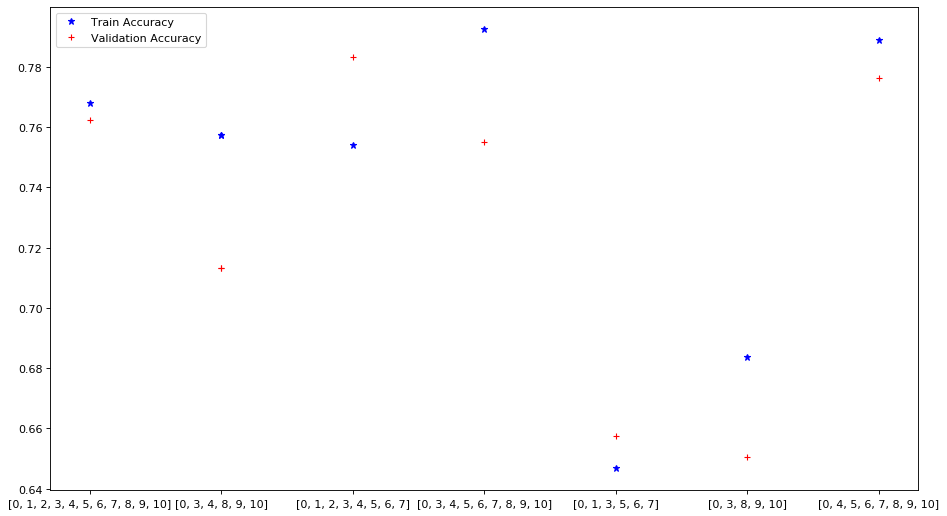

In [51]:

# Graficar las diferentes combinaciones
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
combinaciones_str = [str(comb) for comb in combinaciones]
plt.plot(combinaciones_str, resultadosNB.AccuracyTrain, 'b*',
         combinaciones_str, resultadosNB.AccuracyVal, 'r+');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [53]:
# Mejor modelo de NB
finalNBFilter = [0,4,5,6,7,8,9,10]
mNB_final = obtenerNaiveBayes(X_train_cv, y_train_cv, finalNBFilter)

# Se guarda el mejor modelo de NB junto con su filtro de variables
#np.savez(file = "modelos/finalNBFilter", finalNBFilter = finalNBFilter)
#joblib.dump(mNB_final, "modelos/nb.pkl")

# Accuracy final sobre entrenamiento, validación y entrenamiento-validación
(mt.accuracy_score(y_train, mNB_final.predict(X_train[:, finalNBFilter])), 
mt.accuracy_score(y_val, mNB_final.predict(X_val[:, finalNBFilter])), 
mt.accuracy_score(y_train_cv, mNB_final.predict(X_train_cv[:, finalNBFilter])))

(0.7908611599297012, 0.7762237762237763, 0.7879213483146067)

In [65]:
# Probabilidad de una pdFeature = x
def probFeature(pdDataFrame, featureName, x, qsize):
    # Obtener las categorías de pdFeature y los bins 
    f, bins_f = pd.qcut(pdDataFrame[featureName], qsize, retbins=True, duplicates='drop')
    #print(f.value_counts())
    # Obtener el rango para el valor x
    rango = pd.cut(x, bins = bins_f)
    
    # Obtener la prob. de que x esté en un rango de f 
    if rango.isnull().any():
        return 0, bins_f
    
    return (f.value_counts()[rango] / len(f)).values, bins_f


# Probabilidad de una pdFeature = x, dado un valor de Class = label
def probFeatureDadoLabel(pdDataFrame, featureName, x, className, label, bins_f):
    # Obtener las categorías de pdFeature y los bins 
    f = pd.cut(pdDataFrame.loc[pdDataFrame[className] == label , featureName], 
               bins = bins_f, include_lowest=True)
    # Obtener el rango para el valor x
    rango = pd.cut(x, bins = bins_f, include_lowest=True)
    
    # Obtener la prob. de que x esté en un rango de f 
    if rango.isnull().any():
        return np.zeros(len(x))
    
    return (f.value_counts()[rango] / len(f)).values

    
# Para obtener la probabilidad de una clas sobre el dataframe entero
def probLabel(pdDataFrame, className, label):
    p = pdDataFrame.loc[pdDataFrame[className] == label, className].count() / len(pdDataFrame)
    return p


# Probabilidad de una pdFeature = x, dado un valor de Class = label
def probLabelDadoLabel(pdDataFrame, featureName, x, className, label):
    # Probabilidad de la clase
    pClass = pdDataFrame.loc[(pdDataFrame[className] == label), featureName].count()
    # Probabilidad de la clase y del label
    pInt = pdDataFrame.loc[(pdDataFrame[className] == label)&(pdDataFrame[featureName] == 1), featureName].count()
    
    pLabel = pInt/pClass
    pNotLabel = 1. - pLabel
    prob = np.array([pNotLabel, pLabel])
    
    return prob[x.astype(int)]
    
# Función para predecir utilizando Naïve Bayes: 
# Tablas de frecuencia con dataset Titanic
# Obtener probabilidades de las observaciones en TitanicEval
def predecirNBTitanic(Titanic, TitanicEval):
    age = TitanicEval.Age.values
    fare = TitanicEval.Fare.values

    # Rangos para age y fare
    _, binsAge = probFeature(Titanic, "Age", age, 5)
    _, binsFare = probFeature(Titanic, "Fare", fare, 5)

    # En este caso, se probaron diferentes combinaciones de las variables a incluir
    # en el modelo de Naïve Bayes, pero los mejores resultados en el 
    # conjunto de validación se obtuvieron solamente con "Age", "Fare" y "Female"
    
    #BinaryFields = ["Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
    #             "Class_Lower", "Class_Middle", "Class_Upper"]
    #BinaryFields = ["Female", "Class_Lower", "Class_Middle", "Class_Upper"]
    BinaryFields = ["Female"]
    
    survived_list = [0,1]
    p_survived = []
    # Para cada label en la clase Survived
    for survived in survived_list:
        # Probabilidad condicional de features continuas
        pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
        pFareGivenS = probFeatureDadoLabel(Titanic, "Fare", fare, "Survived", survived, binsFare)

        # Probabilidad condicional de features discretas
        pbinaryFeature = np.ones(len(TitanicEval.values))
        for binaryFeature in BinaryFields:
            pbinaryFeature = probLabelDadoLabel(Titanic, binaryFeature, 
                                                TitanicEval[binaryFeature].values, 
                                                "Survived", survived)

        # Probabilidad de la clase Survived = survived
        pSurvived = probLabel(Titanic, "Survived", survived)
        # Obtener el producto de probabilidades condicionales
        p_survived.append( (pAgeGivenS * pFareGivenS * pbinaryFeature) * pSurvived )

    # Renormalizar las probabilidades de Survived = 1,0 y devolver la de Survived=1
    p_survived = np.array(p_survived)
    p_survived_yes = p_survived[1,:] / np.sum(p_survived, axis=0)
    #return p_survived_yes
    return np.array([p > 0.5 for p in p_survived_yes]).astype(np.float)

In [73]:
NBFieldsTrain = ["Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]
NB_freq_varFilter = [0,3,4,5,6,7,8,9,10]

# Obtener pandas de entrenamiento
#Titanic_train = pd.DataFrame(X_train[:, NB_freq_varFilter], columns=NBFields)

Titanic_train = pd.DataFrame(np.column_stack(
    (X_train[:, NB_freq_varFilter], y_train)), columns=NBFieldsTrain)

In [74]:

# Obtener los valores dados por el NB frecuentista
yhat_NBmanual_train = predecirNBTitanic(Titanic_train, Titanic_train)
yhat_NBmanual_train

# Computar las métricas sobre el conjunto de entrenamiento
mt.accuracy_score(y_train, yhat_NBmanual_train)

0.789103690685413

In [75]:
# Obtener pandas de validación

NBFieldsEval = ["Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]

Titanic_val = pd.DataFrame(X_val[:, NB_freq_varFilter], columns=NBFieldsEval)

In [77]:
# Obtener los valores dados por el NB frecuentista
#yhat_NBmanual_val = predecirNBTitanic(Titanic_train, Titanic_val)
yhat_NBmanual_val

# Computar las métricas sobre el conjunto de entrenamiento
mt.accuracy_score(y_val, yhat_NBmanual_val)

NameError: name 'yhat_NBmanual_val' is not defined

In [80]:

# Se guarda el mejor modelo de NB junto con su filtro de variables
#np.savez(file = "modelos/modeloNBfrecuentista", NB_freq_varFilter = NB_freq_varFilter, 
        #NBFieldsEval = NBFieldsEval,
        #Titanic_train = Titanic_train)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [82]:
def entrenarArbolDecision(X, y, max_depth): 
    # Ajustar un modelo de árbol de decisión
    tree_model = tree.DecisionTreeClassifier(max_depth = max_depth)
    tree_model.fit(X, y)
    # Devolver el objeto del modelo
    return tree_model

entrenarArbolDecision(X_train, y_train, 2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
# Ahora se realizará una grid-search para el parámetro de máxima profundidad
trainMetricslist = []
valMetricslist = []
depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for depth in depth_list: 
    # Entrenar diferentes modelos de árboles
    tree_model = entrenarArbolDecision(X_train, y_train, depth)
    # Obtener las métricas de entrenamiento y validación
    trainMetrics, valMetrics = getMetrics(tree_model, X_train, y_train, X_val, y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [84]:
treeResults = pd.DataFrame(np.column_stack((depth_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Profundidad', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
treeResults

,Profundidad,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,2.0,0.785589,0.632530,0.963303,0.785589,0.748252,0.590909,0.866667,0.748252
1,3.0,0.815466,0.744526,0.813830,0.815466,0.818182,0.759259,0.820000,0.818182
2,4.0,0.833040,0.743935,0.932432,0.833040,0.769231,0.645161,0.857143,0.769231
3,5.0,0.854130,0.786632,0.921687,0.854130,0.818182,0.750000,0.847826,0.818182
4,6.0,0.866432,0.804124,0.945455,0.866432,0.811189,0.732673,0.860465,0.811189
5,7.0,0.882250,0.827763,0.969880,0.882250,0.818182,0.750000,0.847826,0.818182
6,8.0,0.889279,0.838046,0.981928,0.889279,0.825175,0.757282,0.866667,0.825175
7,9.0,0.915641,0.881188,0.983425,0.915641,0.825175,0.757282,0.866667,0.825175
8,10.0,0.926186,0.899038,0.968912,0.926186,0.811189,0.747664,0.816327,0.811189
9,11.0,0.936731,0.913043,0.989529,0.936731,0.811189,0.752294,0.803922,0.811189


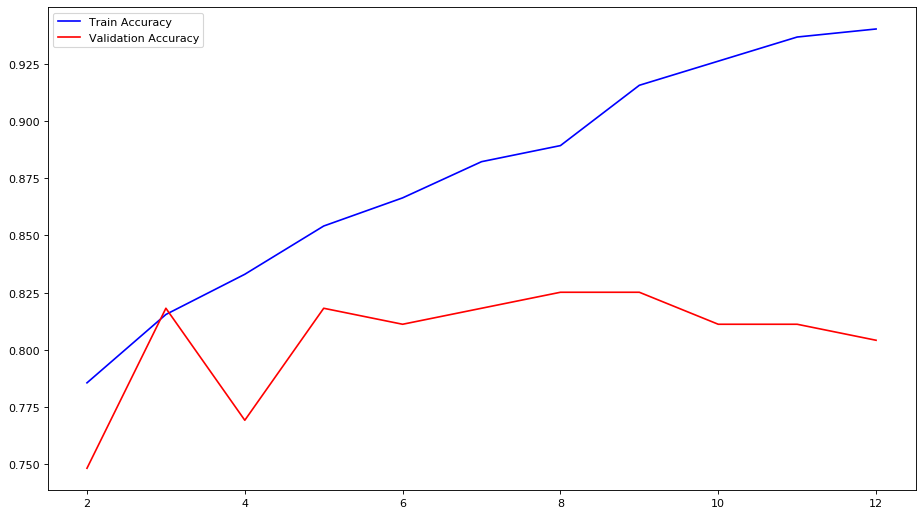

In [85]:
# Graficamos los resultados del accuracy para el conjunto de entrenamiento y de validación
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(treeResults.Profundidad, treeResults.AccuracyTrain, 'b-',
         treeResults.Profundidad, treeResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [87]:
# Mejor modelo de árboles de decisión
tree_final = entrenarArbolDecision(X_train_cv, y_train_cv, max_depth = 7)

# Se guarda el mejor modelo
#joblib.dump(tree_final, "modelos/decision_tree.pkl")

# Accuracy final sobre entrenamiento, validación y entrenamiento-validación
(mt.accuracy_score(y_train, tree_final.predict(X_train)), 
mt.accuracy_score(y_val, tree_final.predict(X_val)), 
mt.accuracy_score(y_train_cv, tree_final.predict(X_train_cv)))

(0.8699472759226714, 0.8811188811188811, 0.8721910112359551)

In [92]:
import graphviz
# Graficamos el árbol resultante
dot_data = tree.export_graphviz(tree_final, out_file=None, 
            feature_names=RawTitanic[NumFields].columns.values, 
            class_names=RawTitanic["passenger_survived"].value_counts().index.values,
            filled=True, rounded=True, special_characters=True)
# Exportar la gráfica
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("modelos/final_tree")

ModuleNotFoundError: No module named 'graphviz'

In [93]:
# Función para generar el pronóstico por votación mayoritaria
# utilizando los 4 modelos. Se cargan los 4 modelos y se obtienen las
# predicciones sobre X. Estas se combinan obteniendo la moda
def predictVotacion(X):
    from scipy import stats
    
    # Cargar el modelo de SVM final
    # Este se entrenó con todas las variables
    svm_final = joblib.load("modelos/svm.pkl")

    
    # Obtener el modelo de regresión logística final y 
    # el filtro de variables
    param_regLog = np.load("modelos/regLogisticaParams.npz")
    w = param_regLog['w']
    b = param_regLog['b']
    regLogVarFilter = param_regLog['varFilter']

    
    # Cargar el modelo de Naïve Bayes de scikit-learn final
    # Cargar el filtro de variables
    nb_final = joblib.load("modelos/nb.pkl")
    nbVarFilter = np.load("modelos/finalNBFilter.npz")['finalNBFilter']

    
    # Cargar el modelo de Naïve Bayes manual frecuencista final
    # Este modelo se trabajó manualmente con Pandas
    modeloNBfrecuentista = np.load("modelos/modeloNBfrecuentista.npz")
    NB_freq_varFilter = modeloNBfrecuentista['NB_freq_varFilter']
    NBFieldsEval = modeloNBfrecuentista['NBFieldsEval']
    Titanic_train = modeloNBfrecuentista['Titanic_train']
    NBFieldsTrain = np.append(NBFieldsEval, "Survived")
    # Obtener pandas de evaluación
    Titanic_train = pd.DataFrame(Titanic_train, columns=NBFieldsTrain)
    Titanic_eval = pd.DataFrame(X[:, NB_freq_varFilter], columns=NBFieldsEval)
    
    # Cargar el modelo final de árbol de decisión
    # Todas las variables
    tree_final = joblib.load("modelos/decision_tree.pkl")

    
    # Obtener las predicciones sobre X con cada modelo
    y_pred_svm = svm_final.predict(X)
    y_pred_nbsci = nb_final.predict(X[:, nbVarFilter])
    y_pred_nbfreq = predecirNBTitanic(Titanic_train, Titanic_eval)
    y_pred_tree = tree_final.predict(X)
    y_pred_reglog = predecirLogistica(X[:, regLogVarFilter], w, b)
    
    # Obtener una matriz con las predicciones para sacar la moda
    y_hat_models = np.column_stack((y_pred_svm, y_pred_nbfreq, 
                                    y_pred_tree, y_pred_reglog))
    #print("Yhat_models: ", y_hat_models)
    
    # Obtener la moda de las predicciones para cada fila de X
    y_hat, _ = stats.mode(y_hat_models, axis = 1)
    #print("Yhat: ", y_hat)
    
    return y_hat, y_hat_models

In [94]:
# Se obtienen los resultados de todos los modelos y la predicción final
# sobre el conjunto de validación para ver cómo funciona
y_hat, y_hat_models = predictVotacion(X_val)

# Se construye un dataframe para ver los resultados
# sobre el conjunto de validación
votingResults = pd.DataFrame(np.column_stack((y_hat_models, y_hat)), 
             columns=["SVM", "Naïve Bayes Pandas", 
                      "Decision Tree", "Logistic", "Votación"])

votingResults.tail(10)

FileNotFoundError: [Errno 2] No such file or directory: 'modelos/svm.pkl'

In [95]:
# Computar el accuracy del sistema de votación
# sobre el conjunto de pruebas jamás visto por los modelos
y_hat_test, _ = predictVotacion(X_test)

# Obtener el accuracy final
mt.accuracy_score(y_test, y_hat_test)

FileNotFoundError: [Errno 2] No such file or directory: 'modelos/svm.pkl'

# Conclusiones

